# Investigating Biased Movie Ratings on Fandango 
Past analysis from 2015 performed by [Walt Hickey](https://fivethirtyeight.com/features/fandango-movies-ratings/) had shown evidence that Fandango's rating system was biased in that movie ratings were rounded up and thus inflated to be higher than they actually were.

In this project, more recent movie rating data was analyzed to determine whether there has been any change in Fandango's rating system since Hickey's analysis.

## Regarding the Data
Two separate sets of data will be analyzed. The [first set of data](https://github.com/fivethirtyeight/data/tree/master/fandango) will contain the movie rating data Hickey analyzed in 2015. The [second set of data](https://github.com/mircealex/Movie_ratings_2016_17) will contain movie rating data for popular movies for 2016 and 2017.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Data 2015 and earlier
before = pd.read_csv('fandango_score_comparison.csv')

# Data after 2015
after = pd.read_csv('movie_ratings_16_17.csv')

In [2]:
pd.set_option('display.max_columns', 500)
before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


First, lets isolate the data pertaining to Fandango, since we will be focusing on if their rating system had changed.

In [4]:
# Fandango Data - Isolated
fandango_before = before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

fandango_after = after[['movie', 'year', 'fandango']].copy()

In [5]:
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [6]:
fandango_after.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


After examining the [`README.md` file](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) for the 'before' sample we find that only movies from 2015 with at least 30 fan reviews on Fandango were selected during sampling. This indicates that this data set is not totally representative of the entire population we are interested in since movies with less than 30 reviews were excluded from the sampled population.

The [`README.md` file](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) for the 'after' sample of popular 2016/2017 movies indicates that only popular movies "with a significant number of votes" were sampled, which is arbitrary. Once again this data set likely does not include the entire population we are interested in.

## Altering the Analysis Objective
Due to the deficiencies resulting from sampling outlined prior, we will change the goal of our analysis to determining if there is any difference in Fandango movie ratings in 2015, compared to Fandango ratings for movies in 2016. Doing so may hint towards whether or not Fandango's rating system had changed following 2015 (our initial goal).

A change of objective is much simpler and feasible as opposed to collecting more relevant data.

## Isolating Samples of Interest
Since we are only concerned with movies released in 2015 and 2016, let's isolate for these movies in seperate dataframes.

In [7]:
# 'before dataset'
# Extract release year from FILM column using regex
fandango_before['year'] = fandango_before['FILM'].str.extract(r"\(([0-9]+)\)", expand=False)

In [8]:
fandango_before['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [9]:
fandango_2015 = fandango_before[fandango_before['year']=='2015'].copy()

In [10]:
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [11]:
fandango_2015.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [12]:
# 'after' dataset
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
fandango_2016 = fandango_after[fandango_after['year']==2016].copy()

In [14]:
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [15]:
fandango_2016.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0


## Comparing Distributions Between Years
To visualize the distribution of Fandango movie ratings between 2015 and 2016, we can overlay a kernel density estimation (kde) plot of the ratings for each year. Visualizing the data allows for ease of comparison of movie ratings between years.

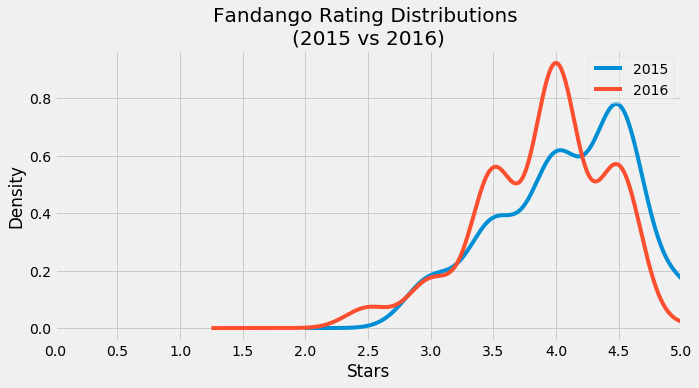

In [16]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(figsize=(10,5), label='2015', legend=True)
fandango_2016['fandango'].plot.kde(label='2016', legend=True)

plt.legend(fancybox=True, framealpha=0.5, loc='upper right')
plt.title('Fandango Rating Distributions \n(2015 vs 2016)', fontsize=20)
plt.xlabel('Stars')
plt.xlim(0,5)  # Star ratings range from 0 - 5
plt.xticks(np.arange(0,5.1,.5))
plt.show()

From the kernel density plots, we can see that both distributions are strongly left skewed. The 2016 plot is shifted slightly to the left of the 2015 plot. This slight shift suggests that there was indeed a change between Fandango's star ratings from 2015-2016. Overall, movies in 2016 appear to be rated lower compared to movies in 2015.

## Comparing Relative Frequencies
From a purely numerical standpoint, a percentage distribution of individual ratings assigned can be computed for each year.

In [17]:
print('2015 \n-----------')
fandango_2015['Fandango_Stars'].value_counts(normalize=True).sort_index() * 100

2015 
-----------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [18]:
print('2016 \n-----------')
fandango_2016['fandango'].value_counts(normalize=True).sort_index() * 100

2016 
-----------


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

Observing the individual star ratings assigned, we find that a significantly larger portion of ratings were 4.5 stars and above in 2015, compared to 2016. Additionally, a greater percentage of ratings were 3.5 stars and below in 2016.

## Visualizing the Direction of Change
To further support our claim that movies in 2016 were rated lower in comparison to those in 2015 by Fandango, average summary statistics of ratings can be computed and compared between the years.

In [19]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
median_2015 = fandango_2015['Fandango_Stars'].median()
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0]

print('2015 \n-----------')
print('mean: \t' + str(mean_2015))
print('median:\t' + str(median_2015))
print('mode: \t' + str(mode_2015))

2015 
-----------
mean: 	4.0852713178294575
median:	4.0
mode: 	4.5


In [20]:
mean_2016 = fandango_2016['fandango'].mean()
median_2016 = fandango_2016['fandango'].median()
mode_2016 = fandango_2016['fandango'].mode()[0]

print('2016 \n-----------')
print('mean: \t' + str(mean_2016))
print('median:\t' + str(median_2016))
print('mode: \t' + str(mode_2016))

2016 
-----------
mean: 	3.887434554973822
median:	4.0
mode: 	4.0


In [21]:
stats = pd.DataFrame()
stats['2015'] = [mean_2015, median_2015, mode_2015]
stats['2016'] = [mean_2016, median_2016, mode_2016]
stats.index = ['mean','median','mode']
stats.reset_index(inplace=True)
stats.head()

,index,2015,2016
0,mean,4.085271,3.887435
1,median,4.000000,4.000000
2,mode,4.500000,4.000000


In [22]:
stats_melt = pd.melt(stats, id_vars=['index'], value_vars=['2015','2016'],
                     var_name="Year", value_name="Stars")
stats_melt.head(10)

,index,Year,Stars
0,mean,2015,4.085271
1,median,2015,4.000000
2,mode,2015,4.500000
3,mean,2016,3.887435
4,median,2016,4.000000
5,mode,2016,4.000000


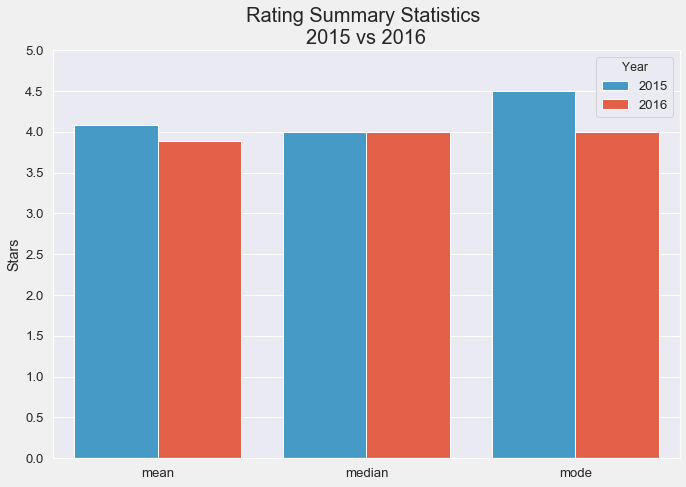

In [23]:
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.set(style="whitegrid")

# Colour Palette
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set(font_scale=1.2)
sns.set_palette(five_thirty_eight)

ax = sns.barplot(x="index", y='Stars', hue='Year', data=stats_melt)
ax.set(xlabel='', ylabel='Stars', ylim=(0,5), yticks=np.arange(0,5.1,.5))
ax.axes.set_title('Rating Summary Statistics \n2015 vs 2016', fontsize=20)
plt.show()

The summary statistics indicate that the Fandango ratings were higher in 2015 compared to 2016 based on the slight changes in mean and mode. This is in line with our previous observations in the kernel density plots generated prior.

## Conclusions
Analysis of the data suggests that there is in fact a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. On average, movies released in 2016 were rated lower on Fandango than those released in 2015. The slight difference is possibly attributed to Fandango fixing their biased rating system following the publication of Hickey's analysis in 2015.